In [1]:
import numpy as np
import pandas as pd
import butterpy as bp
%matplotlib inline

In [2]:
np.random.seed(77)

star = bp.regions(
    butterfly=True, 
    activity_rate=3, 
    cycle_length=5, 
    cycle_overlap=1, 
    decay_time=(24.5*5),
    max_ave_lat=45, 
    min_ave_lat=20,
    alpha_med=(3*3e-4)
)

spots = bp.Spots(
    star, 
    alpha_med=(3*3e-4), 
    period=24.5,
    incl=1, 
    decay_timescale=10, 
    diffrot_shear=0.25
)

In [3]:
time = np.arange(40, 200, 1)
flux = 1 + spots.calc(time)

lc = pd.DataFrame(np.c_[time, flux], columns=['time', 'flux'])

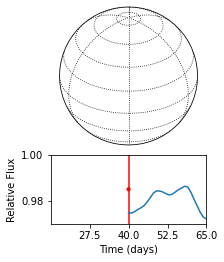

In [4]:
ani = spots.ortho_animation(time, lc, interval=200, fig_kw=dict(figsize=(3, 3.6), constrained_layout=True));
#ani.save("surface.gif", writer="imagemagick", dpi=200, fps=5)

In [5]:
from IPython.display import HTML
ani_html = ani.to_jshtml()
HTML(ani_html)